In [1]:
import pandas as pd
import altair as alt

In [2]:
kof_df = pd.read_csv('Datasets/KOF_clean.csv')
kof_df.head()

,code,country,year,KOFGI,KOFGIdf,KOFGIdj,KOFEcGI,KOFEcGIdf,KOFEcGIdj,KOFTrGI,...,KOFIpGIdj,KOFInGI,KOFInGIdf,KOFInGIdj,KOFCuGI,KOFCuGIdf,KOFCuGIdj,KOFPoGI,KOFPoGIdf,KOFPoGIdj
0,BRA,Brazil,1990,42.0,44.0,40.0,28.0,24.0,31.0,26.0,...,32.0,39.0,32.0,46.0,40.0,29.0,51.0,65.0,85.0,46.0
1,BRA,Brazil,1991,44.0,43.0,44.0,27.0,23.0,31.0,27.0,...,32.0,39.0,31.0,46.0,38.0,30.0,46.0,71.0,84.0,58.0
2,BRA,Brazil,1992,45.0,45.0,45.0,29.0,27.0,32.0,28.0,...,33.0,40.0,31.0,50.0,38.0,29.0,47.0,72.0,84.0,60.0
3,BRA,Brazil,1993,46.0,46.0,46.0,30.0,29.0,32.0,29.0,...,32.0,41.0,30.0,52.0,40.0,32.0,47.0,73.0,84.0,62.0
4,BRA,Brazil,1994,48.0,45.0,50.0,29.0,25.0,33.0,29.0,...,33.0,41.0,30.0,52.0,39.0,34.0,44.0,81.0,86.0,75.0


In [4]:
dataset_list = ['BOVESPA-BRA-Clean', 'CAC40-FRA-Clean', 'DAX30-DEU-Clean', 'HangSeng-HKG-Clean', 'Nikkei225-JPN-Clean', 'Shanghai-CHN-Clean', 'Nifty50-IND-Clean', 'S&P500-USA-Clean']

countries_df = pd.DataFrame(columns=['year', 'YoY Change', 'code'])
for dataset in dataset_list:
    df = pd.read_csv('./Datasets/' + dataset + '.csv')
    countries_df = pd.concat([countries_df, df])

countries_df = pd.concat([countries_df, sp_df])
kof_df = kof_df.merge(countries_df, on=['year', 'code'])

In [5]:
kof_df

,code,country,year,KOFGI,KOFGIdf,KOFGIdj,KOFEcGI,KOFEcGIdf,KOFEcGIdj,KOFTrGI,...,KOFInGI,KOFInGIdf,KOFInGIdj,KOFCuGI,KOFCuGIdf,KOFCuGIdj,KOFPoGI,KOFPoGIdf,KOFPoGIdj,YoY Change
0,BRA,Brazil,1995,49.0,45.0,54.0,30.0,24.0,36.0,30.0,...,43.0,31.0,55.0,40.0,37.0,44.0,82.0,84.0,80.0,2.071614
1,BRA,Brazil,1996,50.0,46.0,55.0,31.0,25.0,37.0,29.0,...,46.0,31.0,60.0,41.0,37.0,44.0,84.0,87.0,81.0,58.436023
2,BRA,Brazil,1997,52.0,48.0,56.0,32.0,26.0,38.0,29.0,...,53.0,44.0,63.0,42.0,38.0,45.0,83.0,86.0,81.0,50.672130
3,BRA,Brazil,1998,52.0,48.0,57.0,34.0,27.0,40.0,28.0,...,54.0,45.0,63.0,43.0,40.0,45.0,83.0,84.0,82.0,-33.759542
4,BRA,Brazil,1999,54.0,50.0,58.0,37.0,33.0,41.0,28.0,...,55.0,47.0,63.0,44.0,42.0,46.0,83.0,84.0,83.0,143.877845
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259,USA,United States,2018,82.0,78.0,86.0,67.0,53.0,81.0,55.0,...,95.0,97.0,93.0,95.0,95.0,94.0,92.0,90.0,94.0,-4.239308
260,USA,United States,2019,82.0,78.0,86.0,67.0,54.0,81.0,54.0,...,95.0,97.0,93.0,96.0,95.0,97.0,92.0,90.0,94.0,19.282571
261,USA,United States,2019,82.0,78.0,86.0,67.0,54.0,81.0,54.0,...,95.0,97.0,93.0,96.0,95.0,97.0,92.0,90.0,94.0,19.282571
262,USA,United States,2020,81.0,77.0,85.0,67.0,52.0,81.0,53.0,...,95.0,97.0,94.0,92.0,95.0,88.0,92.0,90.0,94.0,15.151665


In [6]:
alt.Chart(kof_df).mark_point().encode(
    x='KOFGI',
    y='YoY Change:Q',
    color='code:N'
).interactive()

alt.Chart(...)

<Axes: >

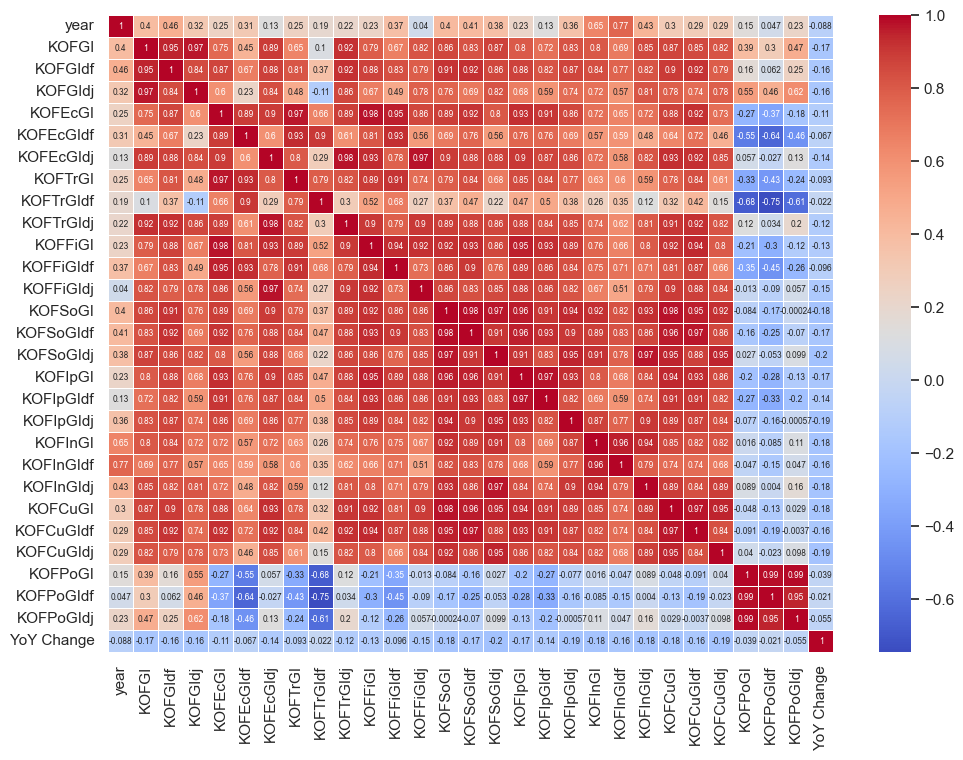

In [7]:
import seaborn as sns
sns.set(rc={'figure.figsize':(11.7,8.27)})
corr = kof_df.drop(['country', 'code'], axis=1).corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,
            cmap='coolwarm',
            annot=True,
            linewidths=.5,
            annot_kws={"size": 6})

In [8]:
kof_df.shape

(264, 31)